In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def process_rdf(base_path):
    # Find all rdf_avg.dat files in subdirectories
    rdf_files = []
    for root, dirs, files in os.walk(base_path):
        if "rdf_avg.dat" in files:
            rdf_files.append(os.path.join(root, "rdf_avg.dat"))

    # Check if RDF files were found
    if not rdf_files:
        print("No rdf_avg.dat files found!")
        exit()

    # Load all RDF data
    all_rdfs = []
    for file in rdf_files:
        data = np.loadtxt(file, comments="#")
        all_rdfs.append(data)

    # Convert to numpy array for easier manipulation
    all_rdfs = np.array(all_rdfs)  # Shape: (num_files, num_bins, 7)

    # Extract r values (assuming all files have the same bins)
    r_values = all_rdfs[0, :, 0]

    # Compute the mean RDF across all runs
    mean_rdf = np.mean(all_rdfs[:, :, 1:], axis=0)  # Averaging over all simulation directories
    sum_rdf = np.sum(mean_rdf, axis=1)

    return r_values, mean_rdf, sum_rdf

def plot_individual(r_values, mean_rdf, title):
    # Plot RDF for each atom pair
    plt.figure(figsize=(10, 6))

    labels = ["COQ6-3", "COQ3-4", "COQ4-6", "COQ6-5", "COQ5-7", "COQ7-3"]
    for i in range(6):
        plt.plot(r_values, mean_rdf[:, i], label=f"RDF {labels[i]}", linewidth=2)

    # Styling
    plt.xlabel("r (Å)", fontsize=14)
    plt.ylabel("g(r)", fontsize=14)
    plt.title(f"Combined Time-Averaged RDF: {title}", fontsize=16)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()

# #plot_individual(r_values_5_random, mean_rdf_5_random, "random edges")
# plot_individual(r_values_5_WT, mean_rdf_5_WT, "WT")
# #plot_individual(r_values_5_random_nodes, mean_rdf_5_random_nodes, "random nodes")
# plot_individual(r_values_5_random_nodes_fixed_network_6, mean_rdf_5_random_nodes_fixed_network_6, "random nodes fixed network 6")
# plot_individual(r_values_5_random_nodes_fixed_network_2, mean_rdf_5_random_nodes_fixed_network_2, "random nodes fixed network 2")
# plot_individual(r_values_5_random_nodes_fixed_network_5, mean_rdf_5_random_nodes_fixed_network_5, "random nodes fixed network 5")
# plot_individual(r_values_5_random_nodes_fixed_network_34512, mean_rdf_5_random_nodes_fixed_network_34512, "random nodes fixed network 34512")


# # Plot RDF for each atom pair
# plt.figure(figsize=(10, 6))

# # Plot the sum of the 6 labels' data
# plt.plot(r_values_5_random, sum_rdf_5_random, label="Sum of RDFs random edges", linewidth=2, linestyle='--', color='red')
# plt.plot(r_values_5_WT, sum_rdf_5_WT, label="Sum of RDFs WT", linewidth=2, linestyle='--', color='blue')
# plt.plot(r_values_5_random_nodes, sum_rdf_5_random_nodes, label="Sum of RDFs random nodes", linewidth=2, linestyle='--', color='green')

# # Styling
# plt.xlabel("r (Å)", fontsize=14)
# plt.ylabel("g(r)", fontsize=14)
# plt.title("Combined Time-Averaged RDF", fontsize=16)
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.6)

# # Show the plot
# plt.show()


In [ ]:
def get_subfolder_paths(folder_path):
    subfolder_paths = []
    for entry in os.listdir(folder_path):
        full_path = os.path.join(folder_path, entry)
        if os.path.isdir(full_path):
            subfolder_paths.append(full_path)
    return subfolder_paths


def readlogfile(logfile_path):
    log_file_full_path = os.path.join(logfile_path, 'output.log')

    with open(log_file_full_path) as file:
        lines = file.readlines()
        start_index = 0
        data_lines = []
        for i, line in enumerate(lines):
            if 'Step E_bond TotEng Temp' in line:
                start_index = i + 1
                break

        # Collect data until a line starts with " loop"
        for line in lines[start_index:]:
            if line.strip().startswith("Loop"):
                break
            data_lines.append(line.split())

    # Now read the actual data into a DataFrame
    df = pd.DataFrame(data_lines, columns=lines[start_index-1].split())

    # Convert necessary columns to float or int as appropriate
    df['Step'] = df['Step'].astype(int)
    for col in df.columns[1:]:  # Convert all other columns assuming they are numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Use 'coerce' to handle any non-numeric entries safely
    return df

def get_mean_yield(path):
    yields = []
    paths = get_subfolder_paths(path)
    for path in paths:
        res = readlogfile(path)
        prod = res.iloc[-1]['f_bondc6[2]']
        yields.append(prod)
    return np.mean(yields), np.std(yields)

In [10]:

kcat = "1kcat"
# Define the base path
base_path_5kcat_WT = f"/n/shakfs1/users/jiojeong/simulations/20241122_metabolon_CoQ9_HSHS1KT_self_interaction_1KT_vary_kcat_new_dump/{kcat}/WT/"
base_path_5kcat_randomized_nodes_fixed_network_6 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250224_randomly_shuffle_nodes_fixed_network/{kcat}"
base_path_5kcat_randomized_nodes_fixed_network_2 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_2"
base_path_5kcat_randomized_nodes_fixed_network_5 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_5"
base_path_5kcat_randomized_nodes_fixed_network_34512 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_34512"

mean_yield_WT, std_dev_yield_WT = get_mean_yield(base_path_5kcat_WT)
mean_yield_random_nodes_fixed_network_6, std_dev_yield_random_nodes_fixed_network_6 = get_mean_yield(base_path_5kcat_randomized_nodes_fixed_network_6)
mean_yield_random_nodes_fixed_network_2, std_dev_yield_random_nodes_fixed_network_2 = get_mean_yield(base_path_5kcat_randomized_nodes_fixed_network_2)
mean_yield_random_nodes_fixed_network_5, std_dev_yield_random_nodes_fixed_network_5 = get_mean_yield(base_path_5kcat_randomized_nodes_fixed_network_5)
mean_yield_random_nodes_fixed_network_34512, std_dev_yield_random_nodes_fixed_network_34512 = get_mean_yield(base_path_5kcat_randomized_nodes_fixed_network_34512)

# # Data
# labels = [
#     "WT", 
#     "Random Nodes 6", 
#     "Random Nodes 2", 
#     "Random Nodes 5", 
#     "Random Nodes 34512"
# ]

# means = [
#     mean_yield_WT, 
#     mean_yield_random_nodes_fixed_network_6, 
#     mean_yield_random_nodes_fixed_network_2, 
#     mean_yield_random_nodes_fixed_network_5, 
#     mean_yield_random_nodes_fixed_network_34512
# ]

# std_devs = [
#     std_dev_yield_WT, 
#     std_dev_yield_random_nodes_fixed_network_6, 
#     std_dev_yield_random_nodes_fixed_network_2, 
#     std_dev_yield_random_nodes_fixed_network_5, 
#     std_dev_yield_random_nodes_fixed_network_34512
# ]

# # Plot
# plt.figure(figsize=(8, 6))
# x = np.arange(len(labels))  # Label locations
# plt.bar(x, means, yerr=std_devs, capsize=5, color='skyblue', alpha=0.7)

# # Labels & Titles
# plt.xticks(x, labels, rotation=45, ha="right")
# plt.ylabel("Mean Yield")
# plt.title("Comparison of Mean Yield Across Different Networks")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Show Plot
# plt.tight_layout()
# plt.show()


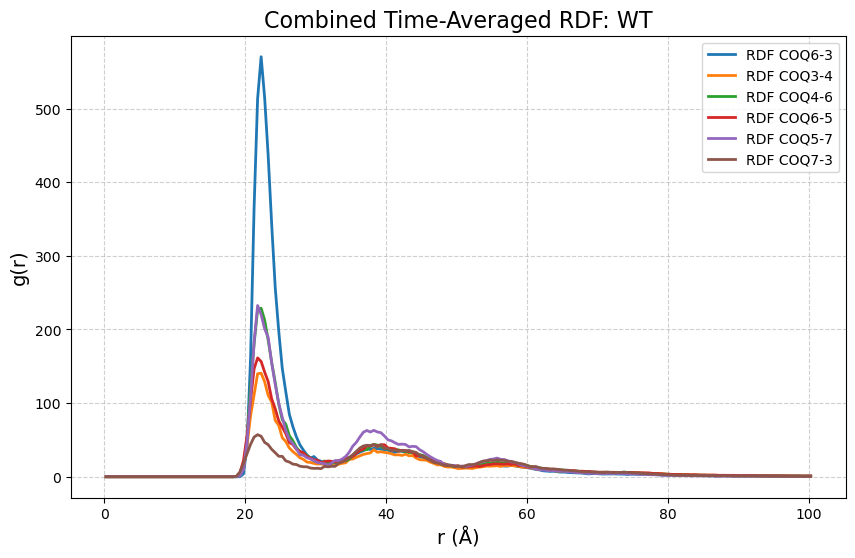

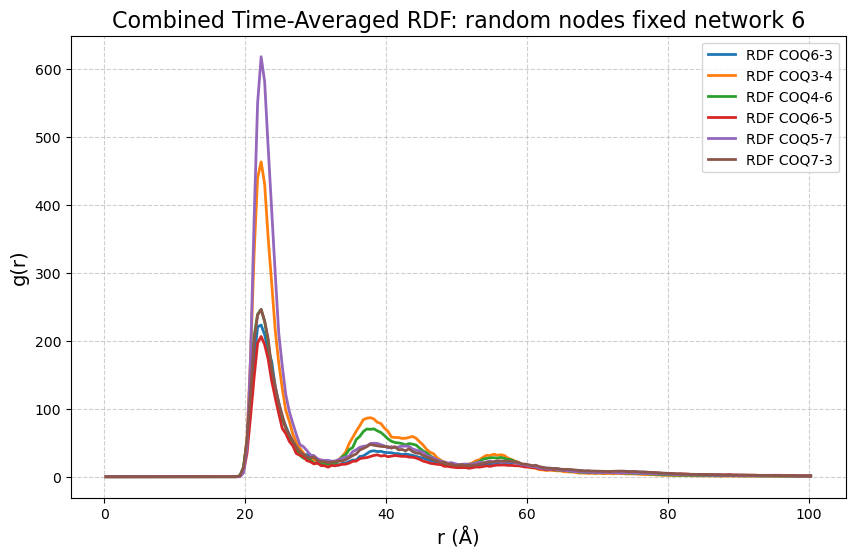

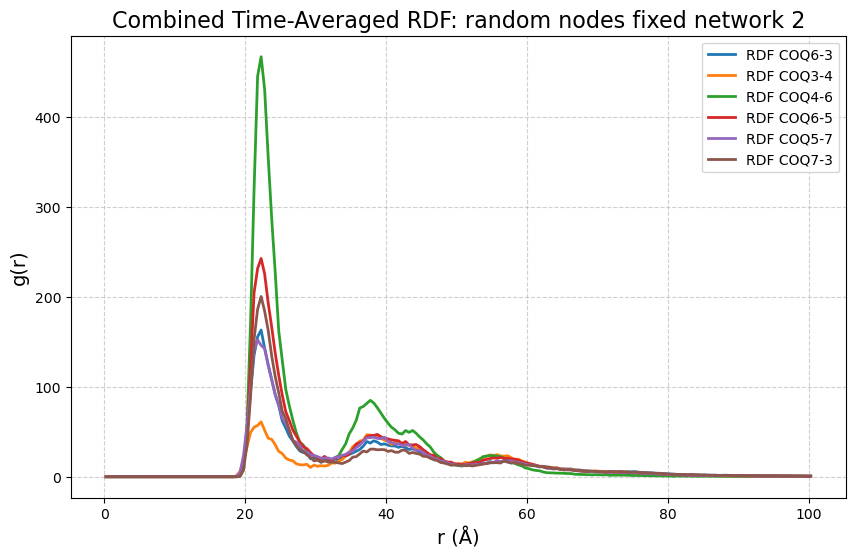

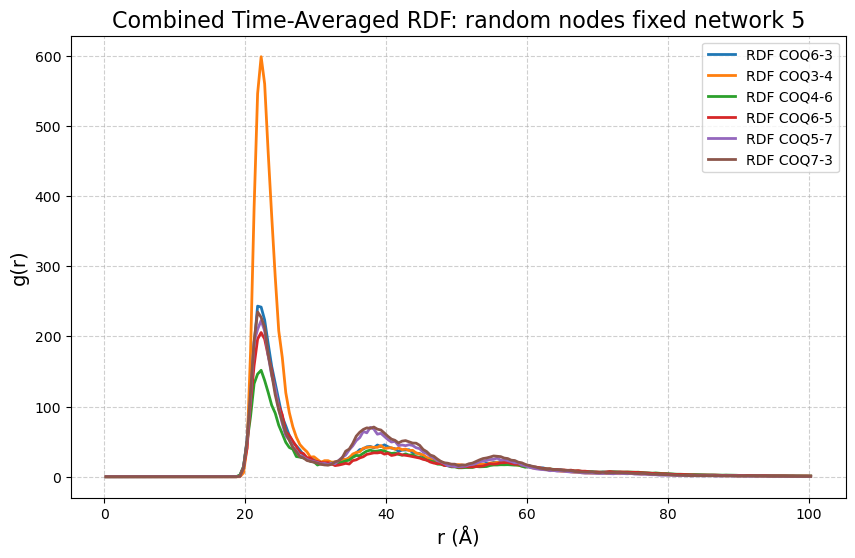

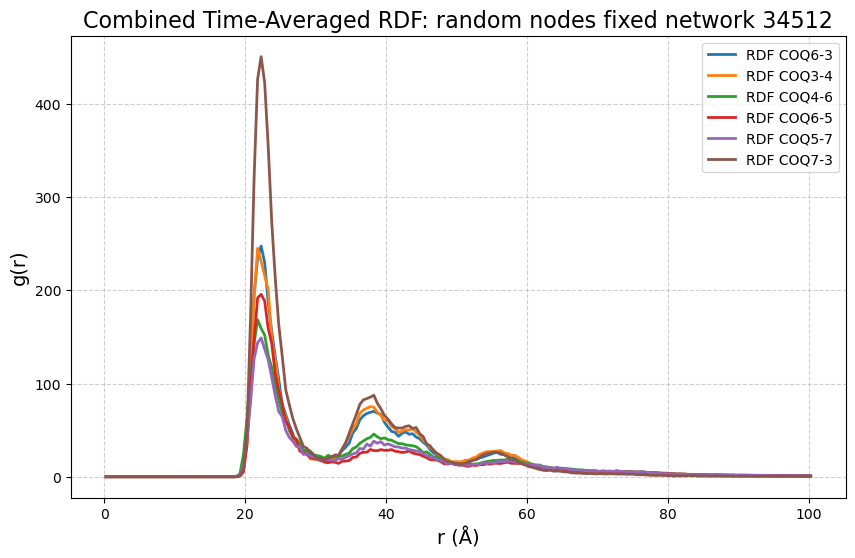

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

kcat = "1kcat"
# Define the base path
base_path_5kcat_WT = f"/n/shakfs1/users/jiojeong/simulations/20241122_metabolon_CoQ9_HSHS1KT_self_interaction_1KT_vary_kcat_new_dump/{kcat}/WT/"
base_path_5kcat_randomized_nodes_fixed_network_6 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250224_randomly_shuffle_nodes_fixed_network/{kcat}"
base_path_5kcat_randomized_nodes_fixed_network_2 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_2"
base_path_5kcat_randomized_nodes_fixed_network_5 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_5"
base_path_5kcat_randomized_nodes_fixed_network_34512 = f"/n/netscratch/shakhnovich_lab/Lab/jiojeong/simulations/20250227_randomly_shuffle_nodes_fixed_network/{kcat}/network_34512"

# Process RDF data
r_values_5_WT, mean_rdf_5_WT, sum_rdf_5_WT = process_rdf(base_path_5kcat_WT)
r_values_5_random_nodes_fixed_network_6, mean_rdf_5_random_nodes_fixed_network_6, sum_rdf_5_random_nodes_fixed_network_6 = process_rdf(base_path_5kcat_randomized_nodes_fixed_network_6)
r_values_5_random_nodes_fixed_network_2, mean_rdf_5_random_nodes_fixed_network_2, sum_rdf_5_random_nodes_fixed_network_2 = process_rdf(base_path_5kcat_randomized_nodes_fixed_network_2)
r_values_5_random_nodes_fixed_network_5, mean_rdf_5_random_nodes_fixed_network_5, sum_rdf_5_random_nodes_fixed_network_5 = process_rdf(base_path_5kcat_randomized_nodes_fixed_network_5)
r_values_5_random_nodes_fixed_network_34512, mean_rdf_5_random_nodes_fixed_network_34512, sum_rdf_5_random_nodes_fixed_network_34512 = process_rdf(base_path_5kcat_randomized_nodes_fixed_network_34512)

# #plot_individual(r_values_5_random, mean_rdf_5_random, "random edges")
# plot_individual(r_values_5_WT, mean_rdf_5_WT, "WT")
# #plot_individual(r_values_5_random_nodes, mean_rdf_5_random_nodes, "random nodes")
# plot_individual(r_values_5_random_nodes_fixed_network_6, mean_rdf_5_random_nodes_fixed_network_6, "random nodes fixed network 6")
# plot_individual(r_values_5_random_nodes_fixed_network_2, mean_rdf_5_random_nodes_fixed_network_2, "random nodes fixed network 2")
# plot_individual(r_values_5_random_nodes_fixed_network_5, mean_rdf_5_random_nodes_fixed_network_5, "random nodes fixed network 5")
# plot_individual(r_values_5_random_nodes_fixed_network_34512, mean_rdf_5_random_nodes_fixed_network_34512, "random nodes fixed network 34512")



In [7]:
import numpy as np

# Convert list of lists to a NumPy array
mean_rdf_5_WT = np.array(mean_rdf_5_WT)  # Shape: (201, 6)
mean_rdf_5_Mut6 = np.array(mean_rdf_5_random_nodes_fixed_network_6)
mean_rdf_5_Mut2 = np.array(mean_rdf_5_random_nodes_fixed_network_2)
mean_rdf_5_Mut5 = np.array(mean_rdf_5_random_nodes_fixed_network_5)
mean_rdf_5_Mut34512 = np.array(mean_rdf_5_random_nodes_fixed_network_34512)

# Transpose to change shape from (201, 6) → (6, 201)
mean_rdf_5_WT_T = mean_rdf_5_WT.T  # Now shape: (6, 201)
mean_rdf_5_Mut6_T = mean_rdf_5_Mut6.T
mean_rdf_5_Mut2_T = mean_rdf_5_Mut2.T
mean_rdf_5_Mut5_T = mean_rdf_5_Mut5.T
mean_rdf_5_Mut34512_T = mean_rdf_5_Mut34512.T


# Now each condition is a list of 6 distributions, each containing 201 numbers


In [28]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Function to compute KL and JS divergence
def kl_divergence(p, q, epsilon=1e-10):
    """Compute KL divergence D_KL(P || Q) while avoiding division by zero."""
    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)

    # Normalize distributions to sum to 1
    p = p / np.sum(p)
    q = q / np.sum(q)

    # Avoid division by zero by adding a small epsilon to q
    q = np.where(q == 0, epsilon, q)  # Replace zero values with a small number

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))  # Compute KL divergence


def js_divergence(p, q):
    """Compute JS divergence (symmetric)"""
    p = np.array(p)
    q = np.array(q)
    p = p / np.sum(p)
    q = q / np.sum(q)
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

# Load your precomputed distributions
conditions = {
    "WT": mean_rdf_5_WT_T,
    "Net6": mean_rdf_5_Mut6_T,
    "Net2": mean_rdf_5_Mut2_T,
    "Net5": mean_rdf_5_Mut5_T,
    "Net34512": mean_rdf_5_Mut34512_T
}
mutant_labels = ["WT", "Net6", "Net2", "Net5", "Net34512"]
num_mutants = len(mutant_labels)
num_distributions = 6  # A-F

# Initialize result matrices (3 rows: Mut1, Mut2, Mut3; 6 columns: A-F)
kl_results = np.zeros((num_mutants, num_distributions))
js_results = np.zeros((num_mutants, num_distributions))

# Compute KL and JS divergence for each distribution (A-F) against WT
for i, dist_label in enumerate(["A", "B", "C", "D", "E", "F"]):
    for j, mutant in enumerate(mutant_labels):
        # Extract the ith distribution (A-F) from WT and mutant
        p = np.array(conditions["WT"][i])  # WT distribution
        q = np.array(conditions[mutant][i])  # Mutant distribution

        # Compute divergences only if valid probability distributions
        if p.ndim == 1 and q.ndim == 1 and p.size == q.size:
            kl_results[j, i] = kl_divergence(p, q)
            js_results[j, i] = js_divergence(p, q)
        else:
            kl_results[j, i] = np.nan
            js_results[j, i] = np.nan  # Handle errors safely

# Convert results into DataFrames
kl_df = pd.DataFrame(kl_results, index=mutant_labels, columns=["A", "B", "C", "D", "E", "F"])
js_df = pd.DataFrame(js_results, index=mutant_labels, columns=["A", "B", "C", "D", "E", "F"])

# Print results
print("\nKL Divergence (WT vs Mutants):\n", kl_df)
print("\nJS Divergence (WT vs Mutants):\n", js_df)

# Compute summary statistics for KL and JS divergence
kl_summary = kl_df.mean(axis=1)  # Mean KL across A-F
js_summary = js_df.mean(axis=1)  # Mean JS across A-F

# Alternative summaries
kl_max = kl_df.max(axis=1)  # Max KL divergence
js_max = js_df.max(axis=1)  # Max JS divergence
kl_median = kl_df.median(axis=1)  # Median KL divergence
js_median = js_df.median(axis=1)  # Median JS divergence

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Mean_KL": kl_summary,
    "Max_KL": kl_max,
    "Median_KL": kl_median,
    "Mean_JS": js_summary,
    "Max_JS": js_max,
    "Median_JS": js_median
})

# Print results
print("\nSummary of KL and JS Divergence (WT vs Mutants):")
print(summary_df)


KL Divergence (WT vs Mutants):
                  A         B         C         D         E         F
WT        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Net6      0.109200  0.083489  0.017142  0.028355  0.103761  0.160407
Net2      0.163143  0.124232  0.092963  0.025325  0.020336  0.207163
Net5      0.100606  0.171486  0.017954  0.024244  0.002310  0.117281
Net34512  0.132502  0.034057  0.013992  0.033907  0.025489  0.343013

JS Divergence (WT vs Mutants):
                  A         B         C         D         E         F
WT        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Net6      0.027787  0.018723  0.004369  0.006782  0.024123  0.041119
Net2      0.040469  0.029525  0.019223  0.005581  0.005293  0.051814
Net5      0.025402  0.038210  0.004528  0.005296  0.000580  0.028970
Net34512  0.033736  0.007864  0.003516  0.007524  0.006667  0.081542

Summary of KL and JS Divergence (WT vs Mutants):
           Mean_KL    Max_KL  Median_KL   Mean_JS    Max

/tmp/ipykernel_654536/2481803484.py:18: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))  # Compute KL divergence
/tmp/ipykernel_654536/2481803484.py:18: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))  # Compute KL divergence


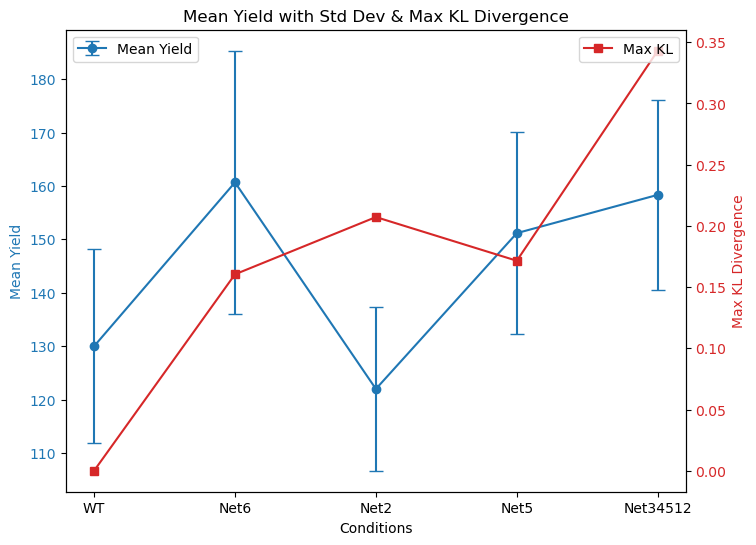

In [32]:
# Define Max KL values from the provided summary
max_kl_values = summary_df["Max_KL"].values

# Define conditions
conditions = ["WT", "Net6", "Net2", "Net5", "Net34512"]

# Mean yield and standard deviations
mean_yields = [mean_yield_WT, mean_yield_random_nodes_fixed_network_6, mean_yield_random_nodes_fixed_network_2, mean_yield_random_nodes_fixed_network_5, mean_yield_random_nodes_fixed_network_34512]
std_yields = [std_dev_yield_WT, std_dev_yield_random_nodes_fixed_network_6, std_dev_yield_random_nodes_fixed_network_2, std_dev_yield_random_nodes_fixed_network_5, std_dev_yield_random_nodes_fixed_network_34512]
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot mean yield with std deviation on primary y-axis (left)
ax1.errorbar(conditions, mean_yields, yerr=std_yields, fmt='o-', capsize=5, label="Mean Yield", color='tab:blue')
ax1.set_ylabel("Mean Yield", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create secondary y-axis (right) for Max KL values
ax2 = ax1.twinx()
ax2.plot(conditions, max_kl_values, 's-', color='tab:red', label="Max KL")
ax2.set_ylabel("Max KL Divergence", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and labels
plt.title("Mean Yield with Std Dev & Max KL Divergence")
ax1.set_xlabel("Conditions")

# Show legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()
